In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation tool 
from matplotlib import cm 
import seaborn as sns 

In [2]:
# read data set 
energydf = pd.read_csv('C:/Users/zrsea/Documents/Case Studies/Global Renewable Energy Production/global_renewable_energy_production.csv')


In [3]:
# see first few rows of data 
energydf.head()

,Year,Country,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
0,2000,USA,437.086107,1435.928598,1544.389701,319.396318,3736.800724
1,2001,USA,240.416776,402.792876,398.742141,439.779266,1481.731059
2,2002,USA,641.003511,1120.494351,334.993640,486.459433,2582.950935
3,2003,USA,849.198377,476.040844,609.102444,132.532029,2066.873694
4,2004,USA,373.818019,882.183361,1034.306532,181.053113,2471.361025


In [4]:
# see last few rows and last few rows of data 
energydf.tail()

,Year,Country,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
235,2019,Japan,346.649699,920.431403,1407.414660,423.383812,3097.879574
236,2020,Japan,285.779145,214.294577,532.705571,455.008389,1487.787682
237,2021,Japan,886.501070,976.637033,1320.878663,349.266504,3533.283269
238,2022,Japan,257.834151,1388.735530,1011.909892,222.412338,2880.891910
239,2023,Japan,567.025935,261.055757,582.681727,382.115127,1792.878546


In [5]:
# see description of data 
energydf.describe()

,Year,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2011.500000,528.523858,857.133260,1076.581975,287.127554,2749.366647
std,6.936653,271.183089,375.020314,499.981598,128.460792,695.126957
min,2000.000000,104.555425,206.021630,320.662607,54.876943,910.381025
25%,2005.750000,284.700505,523.572495,593.796081,176.322725,2250.759951
50%,2011.500000,533.436429,882.024084,1046.390380,291.398276,2815.458943
75%,2017.250000,766.701662,1160.199295,1495.160715,405.479393,3217.212712
max,2023.000000,996.973153,1487.070005,1983.858741,499.872953,4628.164753


In [7]:
# see data type
energydf.dtypes

Year                      int64
Country                  object
SolarEnergy             float64
WindEnergy              float64
HydroEnergy             float64
OtherRenewableEnergy    float64
TotalRenewableEnergy    float64
dtype: object

In [8]:
# check for duplications 
energydf.duplicated().sum()

0

In [9]:
# check for NAs
energydf.isna().sum()

Year                    0
Country                 0
SolarEnergy             0
WindEnergy              0
HydroEnergy             0
OtherRenewableEnergy    0
TotalRenewableEnergy    0
dtype: int64

In [10]:
#see shape
energydf.shape

(240, 7)

In [11]:
# number of unique countries in dataset 
energydf['Country'].nunique()

10

In [12]:
# Highest renewable energy producer 
total_energy_produced = energydf.groupby('Country')['TotalRenewableEnergy'].sum().round(2).sort_values(ascending=False)
total_energy_produced = total_energy_produced.reset_index()
total_energy_produced.columns = ['Country', 'TotalRenewableEnergy']
total_energy_produced

,Country,TotalRenewableEnergy
0,France,73826.14
1,India,71996.56
2,UK,69652.53
3,China,66824.22
4,Australia,66109.38
5,USA,64576.62
6,Canada,64207.08
7,Germany,63409.58
8,Japan,61930.01
9,Brazil,57315.87


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

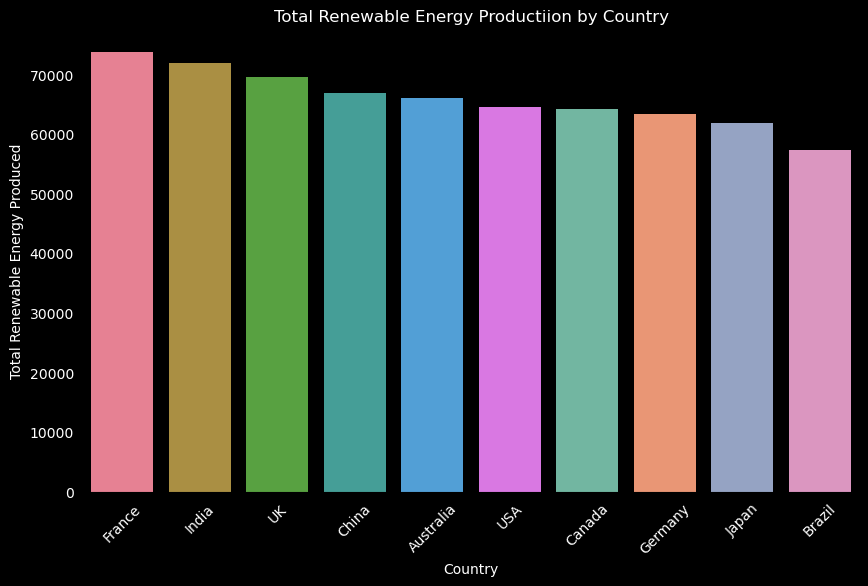

In [13]:
sns.set_palette('husl') # set palette
husl_palette = sns.color_palette('husl') # get palette 
set2_palette = sns.color_palette('Set2', n_colors=5)
combined_palette = husl_palette + set2_palette # combine palette

plt.figure(figsize=(10,6))

ax1 = sns.barplot(x= 'Country', y='TotalRenewableEnergy', palette=combined_palette, data=total_energy_produced)

ax1.set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.xlabel('Country', color='white')
plt.ylabel('Total Renewable Energy Produced', color='white')
plt.title('Total Renewable Energy Productiion by Country', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

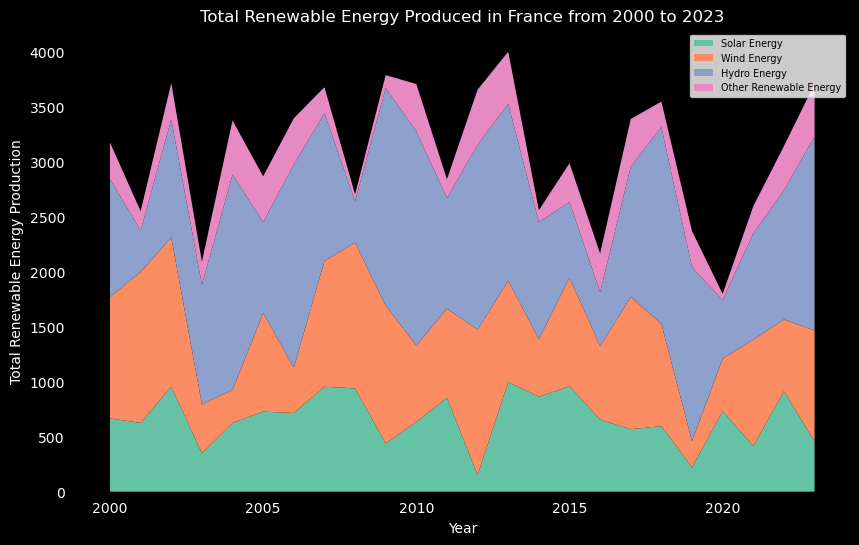

In [14]:
# renewable energy distribution for France 
francedf = energydf[energydf['Country'] == 'France']

fig, ax2 = plt.subplots(figsize=(10, 6))

colormap = cm.get_cmap('Set2')
renewenergytypecolors = colormap.colors

Years = francedf['Year']
SolarEnergy = francedf['SolarEnergy']
WindEnergy = francedf['WindEnergy']
HydroEnergy = francedf['HydroEnergy']
OtherRenewableEnergy = francedf['OtherRenewableEnergy']

ax2.stackplot(Years,
              SolarEnergy,
              WindEnergy,
              HydroEnergy,
              OtherRenewableEnergy,
              labels = ['Solar Energy', 'Wind Energy', 'Hydro Energy', 'Other Renewable Energy'],
              colors=[renewenergytypecolors[0], renewenergytypecolors[1], renewenergytypecolors[2], renewenergytypecolors[3]])

ax2.set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.xlabel('Year', color='white')
plt.ylabel('Total Renewable Energy Production', color='white')
plt.title('Total Renewable Energy Produced in France from 2000 to 2023', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.legend(fontsize='x-small')


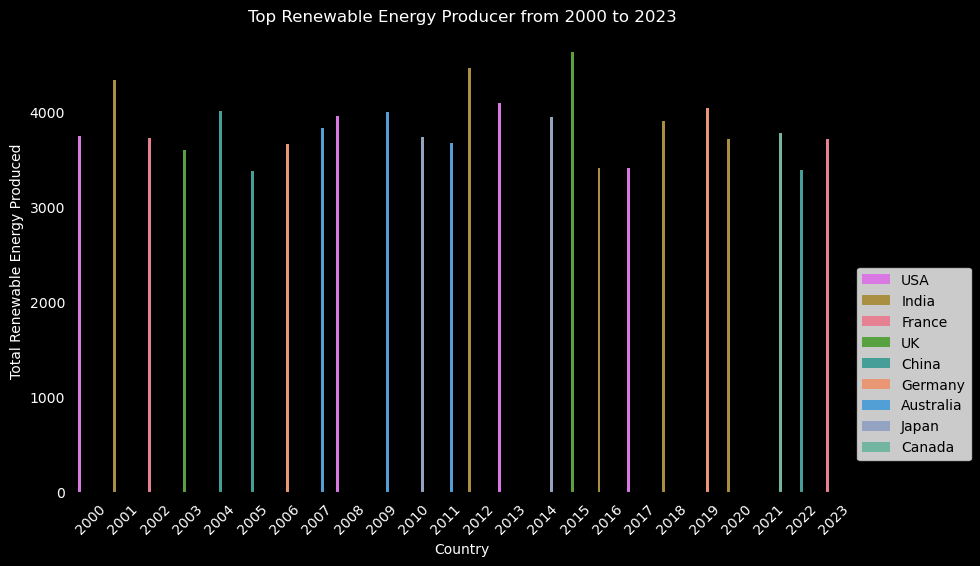

In [15]:
top_producer_by_year = energydf.loc[energydf.groupby('Year')['TotalRenewableEnergy'].idxmax()]
top_producer_by_year = top_producer_by_year[['Year', 'Country', 'TotalRenewableEnergy']]
top_producer_by_year['TotalRenewableEnergy'] = top_producer_by_year['TotalRenewableEnergy'].round(2)

CountryColours = {
    'France': combined_palette[0],
    'India': combined_palette[1],
    'UK': combined_palette[2],
    'China': combined_palette[3],
    'Australia': combined_palette[4],
    'USA': combined_palette[5],
    'Canada': combined_palette[6],
    'Germany': combined_palette[7],
    'Japan': combined_palette[8],
    'Brazil': combined_palette[9],
}

plt.figure(figsize=(10,6))

ax3 = sns.barplot(x='Year', y='TotalRenewableEnergy', hue='Country', data=top_producer_by_year, palette=CountryColours)

ax3.set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.xlabel('Country', color='white')
plt.ylabel('Total Renewable Energy Produced', color='white')
plt.title('Top Renewable Energy Producer from 2000 to 2023', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.legend(bbox_to_anchor=(1, 0.5))

In [17]:
# number of times each ountries in top_producer_by_year appeared 
top_producer_by_year['Country'].value_counts()

India        5
USA          4
China        3
Australia    3
France       2
UK           2
Germany      2
Japan        2
Canada       1
Name: Country, dtype: int64

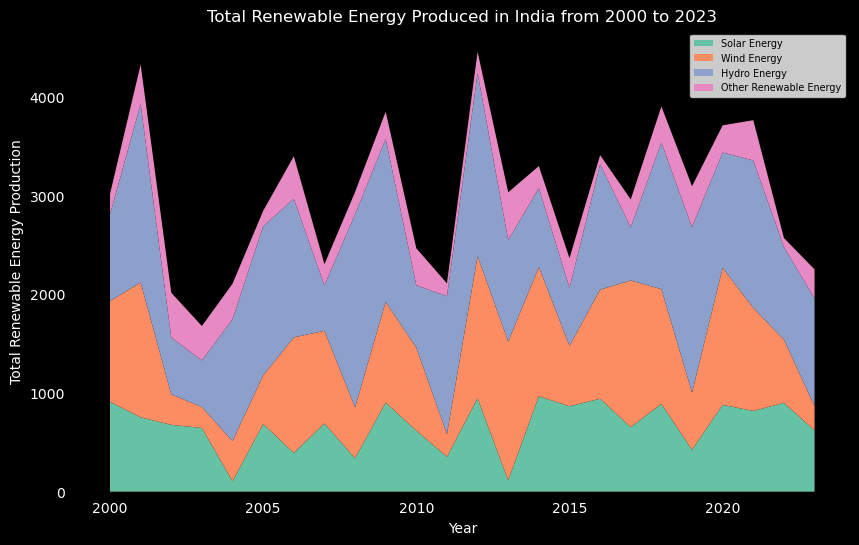

In [18]:
indiadf = energydf[energydf['Country'] == 'India']

fig, ax4 = plt.subplots(figsize=(10, 6)) #change the ax number

colormap = cm.get_cmap('Set2')
renewenergytypecolors = colormap.colors

Years = indiadf['Year']
SolarEnergy = indiadf['SolarEnergy']
WindEnergy = indiadf['WindEnergy']
HydroEnergy = indiadf['HydroEnergy']
OtherRenewableEnergy = indiadf['OtherRenewableEnergy']

ax4.stackplot(Years,
              SolarEnergy,
              WindEnergy,
              HydroEnergy,
              OtherRenewableEnergy,
              labels = ['Solar Energy', 'Wind Energy', 'Hydro Energy', 'Other Renewable Energy'],
              colors=[renewenergytypecolors[0], renewenergytypecolors[1], renewenergytypecolors[2], renewenergytypecolors[3]])

ax4.set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.xlabel('Year', color='white')
plt.ylabel('Total Renewable Energy Production', color='white')
plt.title('Total Renewable Energy Produced in India from 2000 to 2023', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.legend(fontsize='x-small')

In [23]:
indiamed = indiadf['TotalRenewableEnergy'].median()
francemed = francedf['TotalRenewableEnergy'].median()

indiamedrounded = round(indiamed,2)
francemedrounded = round(francemed,2)

print('Median of Total Renewable Energy in India:', indiamedrounded)
print('Median of Total Renewable Energy in France:', francemedrounded)

Median of Total Renewable Energy in India: 3025.27
Median of Total Renewable Energy in France: 3159.48


(array([22000., 24000., 26000., 28000., 30000., 32000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

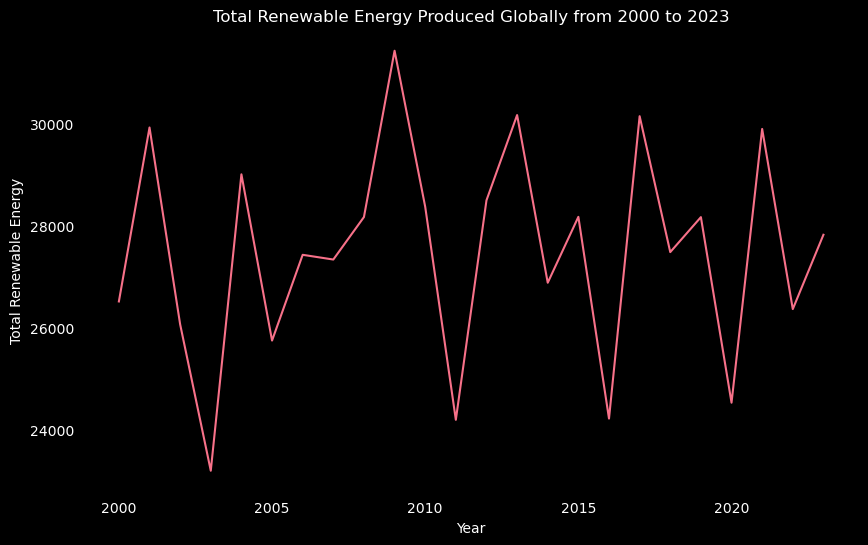

In [25]:
global_renewable_energy_production = energydf.groupby('Year')['TotalRenewableEnergy'].sum().round(2)
global_renewable_energy_production = global_renewable_energy_production.reset_index()

plt.figure(figsize=(10,6))

ax5 = sns.lineplot(x='Year', y='TotalRenewableEnergy', palette= combined_palette, data=global_renewable_energy_production)

ax5.set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.xlabel('Year', color='white')
plt.ylabel('Total Renewable Energy', color='white')
plt.title('Total Renewable Energy Produced Globally from 2000 to 2023', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

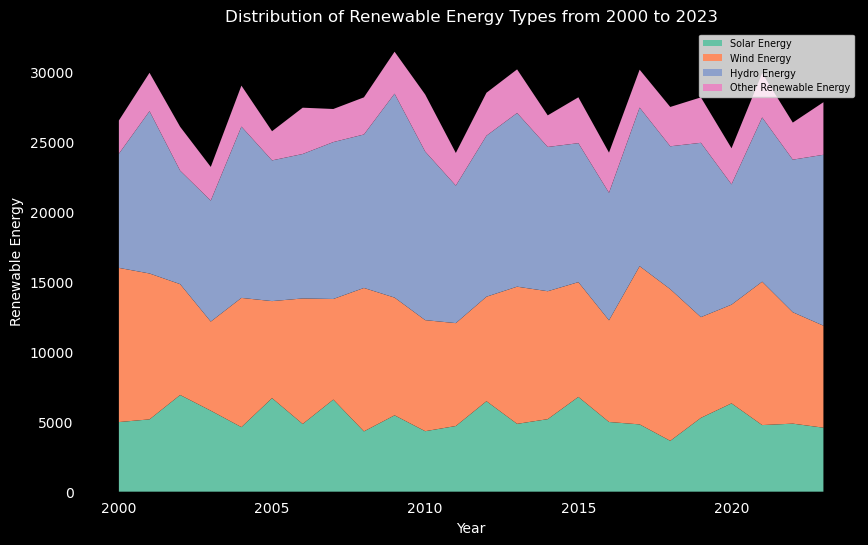

In [26]:
renewable_energy_types = energydf.groupby('Year')[['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy']].sum().round(2)
renewable_energy_types = renewable_energy_types.reset_index()

fig, ax6 = plt.subplots(figsize=(10,6))  

colormap = cm.get_cmap('Set2')
renewenergytypecolors = colormap.colors


Years = renewable_energy_types['Year']
SolarEnergy = renewable_energy_types['SolarEnergy']
WindEnergy = renewable_energy_types['WindEnergy']
HydroEnergy = renewable_energy_types['HydroEnergy']
OtherRenewableEnergy = renewable_energy_types['OtherRenewableEnergy']

ax6.stackplot(Years, 
             SolarEnergy,
             WindEnergy,
             HydroEnergy,
             OtherRenewableEnergy,
             labels = ['Solar Energy', 'Wind Energy', 'Hydro Energy', 'Other Renewable Energy'],
              colors=[renewenergytypecolors[0], renewenergytypecolors[1], renewenergytypecolors[2], renewenergytypecolors[3]])

ax6.set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.xlabel('Year', color='white')
plt.ylabel('Renewable Energy', color='white')
plt.title('Distribution of Renewable Energy Types from 2000 to 2023', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.legend(fontsize='x-small')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


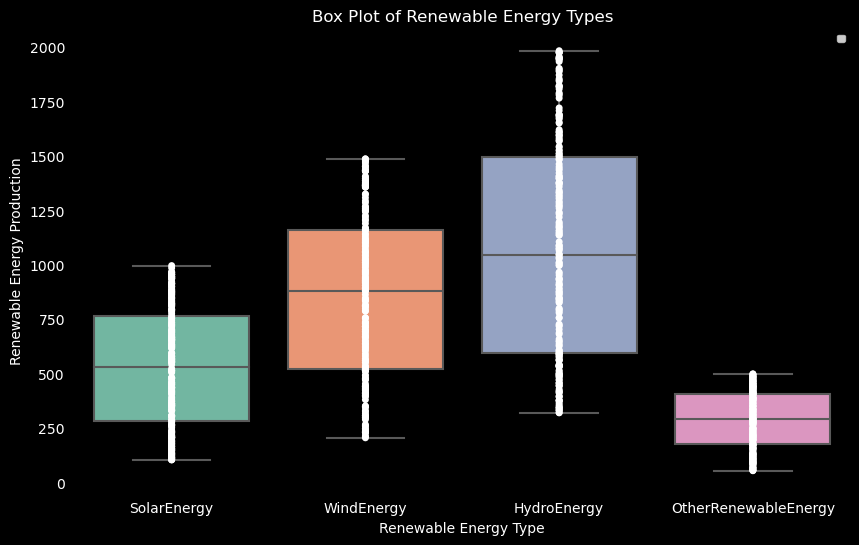

In [27]:
renewable_energy_types_melted = pd.melt(energydf, 
                                        id_vars=['Year'], value_vars=['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy'], 
                                        var_name='EnergyType', 
                                        value_name='RenewableEnergyProduction')

fig, ax7 = plt.subplots(figsize=(10,6))

sns.boxplot(x='EnergyType', y='RenewableEnergyProduction', data=renewable_energy_types_melted, palette=renewenergytypecolors)
sns.stripplot(x='EnergyType', y='RenewableEnergyProduction', data=renewable_energy_types_melted, color='white', size=5, jitter=False)

ax7.set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.xlabel('Renewable Energy Type', color='white')
plt.ylabel('Renewable Energy Production', color='white')
plt.title('Box Plot of Renewable Energy Types', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.legend(fontsize='x-small')

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'SolarEnergy'),
  Text(0, 1.5, 'WindEnergy'),
  Text(0, 2.5, 'HydroEnergy'),
  Text(0, 3.5, 'OtherRenewableEnergy')])

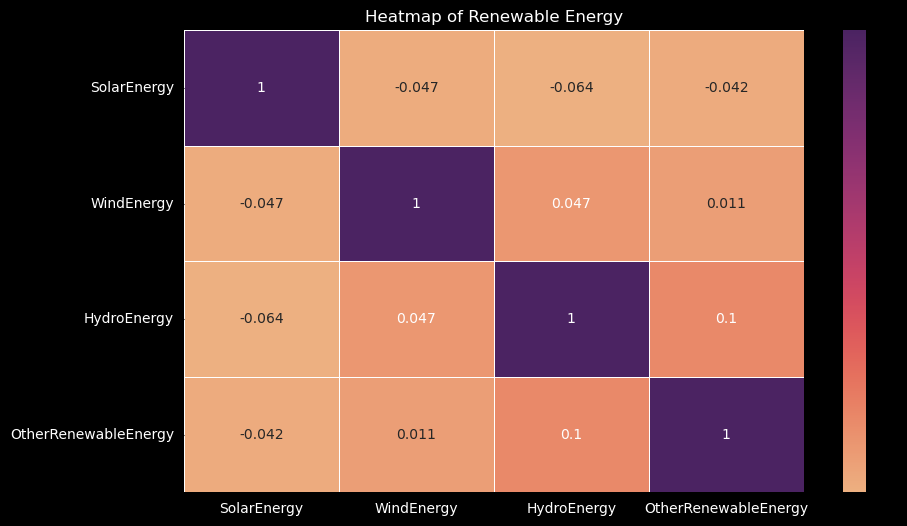

In [28]:
heatmapdf = energydf[['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy']]
corrdf = heatmapdf.corr()

fig, ax8 =  plt.subplots(figsize=(10,6))

sns.heatmap(corrdf, annot=True, cmap='flare',  linewidths=.5)

ax8.set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.title('Heatmap of Renewable Energy', color='white')
plt.xticks(color='white')
plt.yticks(color='white')